#### Name: Pranav Mehendale
#### Roll No.: TCOD34
#### Batch: T11 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
enc=LabelEncoder()
df['Gender']=enc.fit_transform(df['Gender'])

In [8]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


<Axes: >

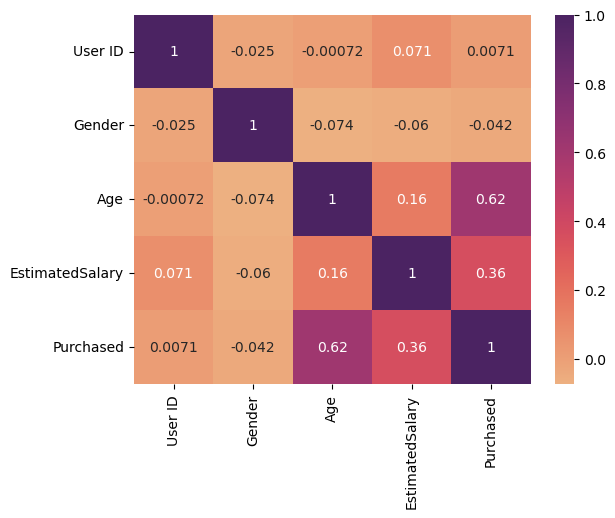

In [9]:
sns.heatmap(df.corr(), annot=True, cmap="flare")

In [10]:
df.drop('User ID',inplace=True,axis=1)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [11]:
X=df.drop('Purchased',axis=1)
Y=df['Purchased']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train,Y_train)

LogisticRegression()

In [16]:
Y_pred=model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve

In [18]:
accuracy_score (Y_test,Y_pred)

0.65

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [20]:
std=StandardScaler()
model2 = make_pipeline(std, LogisticRegression())

In [21]:
model2.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [22]:
y_pred=model2.predict(X_test)

In [23]:
accuracy_score(Y_test,y_pred)

0.8875

In [24]:
confusion_matrix(Y_test,y_pred)

array([[50,  2],
       [ 7, 21]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

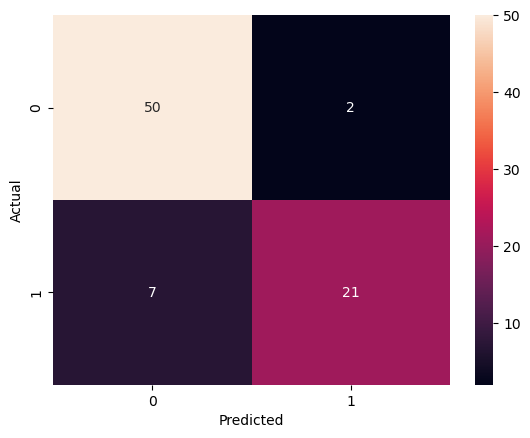

In [25]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [26]:
accuracy_score (Y_test,y_pred)

0.8875

In [27]:
.value_counts()

Purchased
0    205
1    115
Name: count, dtype: int64

Text(0.5, 1.0, 'Train Precision-Recall Curve')

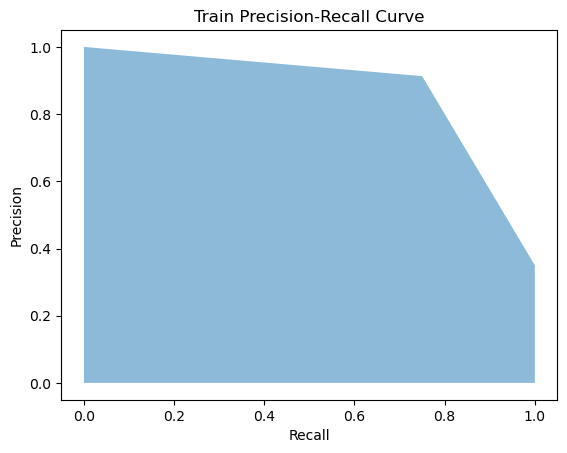

In [30]:
precision, recall, threshold = precision_recall_curve(Y_test, y_pred)
plt.fill_between(recall,precision,alpha = 0.5)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Train Precision-Recall Curve')